In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("E:/11/practical data sets/Mall_Customers.csv")

# Inspect dataset
print("Shape:", df.shape)
print("\nColumns:", df.columns)
df.head()


Shape: (200, 5)

Columns: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("E:/11/practical data sets/Mall_Customers.csv")

# Check dataset info
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())

# Select features for clustering (based on Spending Score)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()


Shape of dataset: (200, 5)

Columns: Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Missing values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
from sklearn.model_selection import train_test_split

# Split data (optional for clustering)
X_train, X_test = train_test_split(X, test_size=0.25, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (150, 2)
Testing set shape: (50, 2)


E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

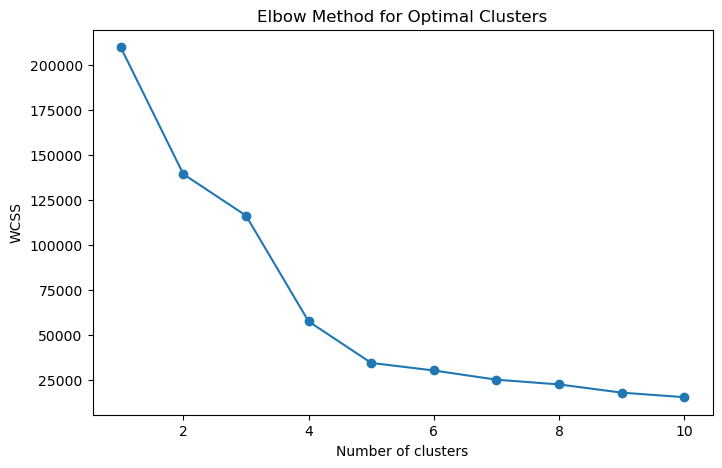

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


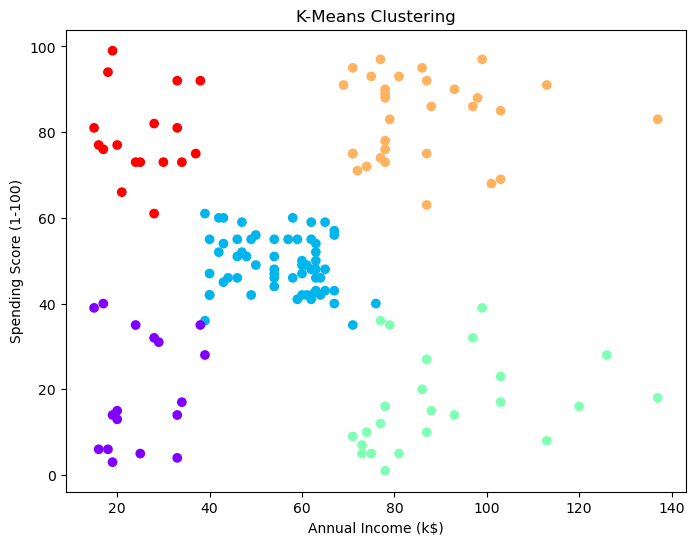

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

# Apply K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_train)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_kmeans, cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.show()


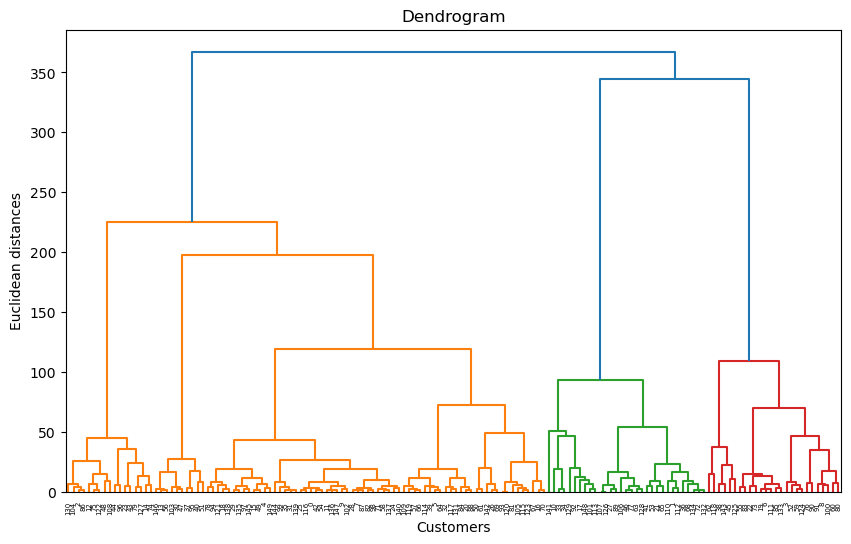

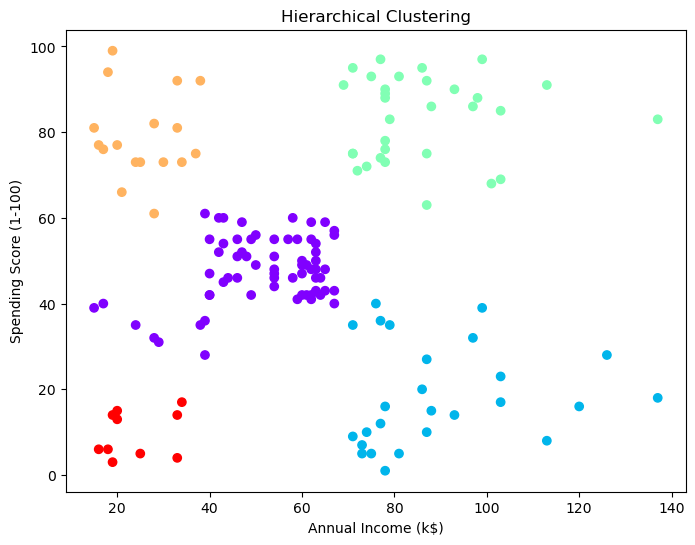

In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Dendrogram
plt.figure(figsize=(10,6))
sch.dendrogram(sch.linkage(X_train, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

# Apply Agglomerative Clustering (5 clusters)
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_train)

# Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_hc, cmap='rainbow')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Hierarchical Clustering")
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X_train, y_kmeans)
score_hc = silhouette_score(X_train, y_hc)

print(f"Silhouette Score - KMeans: {score_kmeans:.4f}")
print(f"Silhouette Score - Hierarchical: {score_hc:.4f}")


Silhouette Score - KMeans: 0.5531
Silhouette Score - Hierarchical: 0.5295


In [12]:
scores = []
for seed in [0, 10, 42, 100]:
    kmeans = KMeans(n_clusters=5, random_state=seed)
    y_pred = kmeans.fit_predict(X_train)
    score = silhouette_score(X_train, y_pred)
    scores.append(score)
    print(f"Random state {seed} -> Silhouette Score: {score:.4f}")

print("\nAverage Silhouette Score:", sum(scores)/len(scores))


Random state 0 -> Silhouette Score: 0.5521
Random state 10 -> Silhouette Score: 0.5521
Random state 42 -> Silhouette Score: 0.5531
Random state 100 -> Silhouette Score: 0.5521

Average Silhouette Score: 0.5523566551455533


E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl